In [ ]:
from google.colab import files  # library for importing files in google collab

In [ ]:
uploaded = files.upload()  # upload the tv_shows.csv dataset from your local machine 

Saving tv_shows.csv to tv_shows.csv


The **'Pandas'** library is probably the **most important** package for all data scientists. It allows you to work with tabular data and perform **data** **manipulation**, **analysis**, and **visualization**. 

The key data structure in Pandas is the **dataframe**. It has rows, columns, indices and headings. You can visualize this as a table. In addition, you can perform multiple operations on a dataframe object:


*   Merging, Joining, Concatenating
*   Operations 
*   Sorting/Ordering
*   Plotting
*   etc...



Check out https://pandas.pydata.org/ to learn more about this library

In [ ]:
import pandas as pd    # import the pandas library

In [ ]:
# **** CREATING DATAFRAMES ****

# There are multiple ways you can create a dataframe. You can use dictionaries, arrays, or lists.  

my_dict = {'First Column': [1,2,3,4,5], 'Second Column': [1,4,9,16,25]}             # Recall the dictionary dtype: dict = {key: value}                                                                     
my_dataframe = pd.DataFrame(my_dict, columns=['First Column', 'Second Column'])     # pd.DataFrame is a method that allows you to create a dataframe      

my_dataframe          # call your object, to display it on the screen

,First Column,Second Column
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [ ]:
# Notice that the dataframe automatically generates indices from 0 - 4. Although it looks like a column it technically isn't. Its required for some built-in operations for dataframes. 

In [ ]:
my_dataframe['First Column']          # access a column and its values - df['Column Name']

0    1
1    2
2    3
3    4
4    5
Name: First Column, dtype: int64

In [ ]:
my_dataframe['Second Column']      

0     1
1     4
2     9
3    16
4    25
Name: Second Column, dtype: int64

In [ ]:
# Create a third column called "Sum". This will represent the index-wise sum of "First Column" and "Second Column"

my_dataframe["Third Column"] = my_dataframe["First Column"] + my_dataframe["Second Column"]    # Creating the third column automatically adds it to my_dataframe
my_dataframe

,First Column,Second Column,Third Column
0,1,1,2
1,2,4,6
2,3,9,12
3,4,16,20
4,5,25,30


In [ ]:
# Another way to add a column...
animal_list = ['Dog', 'Cat', 'Bird', 'Hippo', 'Crocodile']
my_dataframe['Animals'] = animal_list

my_dataframe

,First Column,Second Column,Third Column,Animals
0,1,1,2,Dog
1,2,4,6,Cat
2,3,9,12,Bird
3,4,16,20,Hippo
4,5,25,30,Crocodile


In [ ]:
# **** SELECTION, DELETION AND INDEXING ****

my_dataframe[['Second Column', 'Animals']]   # Pass in a list of multiple columns to display each of its values

,Second Column,Animals
0,1,Dog
1,4,Cat
2,9,Bird
3,16,Hippo
4,25,Crocodile


In [ ]:
# You can access the rows of a dataframe using the .loc and .iloc methods

my_dataframe.iloc[0:3]   # show me the first 3 rows (from index 0 --> index 2)   Note: [a,b) b is excluded

,First Column,Second Column,Third Column,Animals
0,1,1,2,Dog
1,2,4,6,Cat
2,3,9,12,Bird


In [ ]:
my_dataframe.loc[0:3]  # show me the first 4 rows (from index 0 --> index 3)    Note: [a,b]  b is included

,First Column,Second Column,Third Column,Animals
0,1,1,2,Dog
1,2,4,6,Cat
2,3,9,12,Bird
3,4,16,20,Hippo


In [ ]:
my_dataframe[2:3]   # slicing also works  

,First Column,Second Column,Third Column,Animals
2,3,9,12,Bird


In [ ]:
my_dataframe.loc[2, "Animals"]   # Access individual elements in the dataframe

'Bird'

In [ ]:
# What's the difference between .loc and .iloc? 
# .loc is LABELED-BASED indexing, which means you should specify rows and columns based on their row and column labels 
# .iloc is INTEGER-BASED indexing, which means that you have to specify rows and columns by their integer index


# Create a new dataframe with string indices to demonstrate the difference:

# iPhone 12 prices

new_index = ['iPhone12', 'iPhone12 Pro', 'iPhone Pro Max']
dict1 = {'Cost $': [749, 999, 1099], 'Tier': ['Low Tier', 'Mid Tier', 'High Tier']}
new_dataframe = pd.DataFrame(dict1, columns=['Cost $', 'Tier'], index=new_index)

In [ ]:
# Call the new_dataframe to see what it looks like 
new_dataframe

,Cost $,Tier
iPhone12,749,Low Tier
iPhone12 Pro,999,Mid Tier
iPhone Pro Max,1099,High Tier


In [ ]:
# new_dataframe.loc[0]  will throw an error since '0' isn't part any of the index labels 

new_dataframe.loc['iPhone12'] 

Cost $         749
Tier      Low Tier
Name: iPhone12, dtype: object

In [ ]:
new_dataframe.iloc[1]    # .iloc behaves the same 

Cost $         999
Tier      Mid Tier
Name: iPhone12 Pro, dtype: object

In [ ]:
new_dataframe.loc['iPhone12 Pro':]    

,Cost $,Tier
iPhone12 Pro,999,Mid Tier
iPhone Pro Max,1099,High Tier


In [ ]:
# Deleting columns from a dataframe

new_dataframe.drop('Tier', axis = 1)     # .drop will remove any unwanted columns, but you MUST specify the axis. 
                                         # axis = 1 refers to the COLUMNS, axis = 0 refers to the ROWS
                                         # by default, axis = 0. An error will be thrown if you write new_dataframe.drop('Tier') since 'Tier' doesn't exist as a label for any of the rows

,Cost $
iPhone12,749
iPhone12 Pro,999
iPhone Pro Max,1099


In [ ]:
new_dataframe     # .drop doesn't permanently remove a column/row, it creates a copy of the dataframe and then removes it (i.e. this isn't the original new_dataframe)

,Cost $,Tier
iPhone12,749,Low Tier
iPhone12 Pro,999,Mid Tier
iPhone Pro Max,1099,High Tier


In [ ]:
new_dataframe.drop('Tier', axis = 1, inplace= True)   # Set inplace = True to make permanent changes to the new_dataframe

In [ ]:
new_dataframe

,Cost $
iPhone12,749
iPhone12 Pro,999
iPhone Pro Max,1099


In [ ]:
# **** SIMPLE CONDITIONALS WITH DATAFRAMES ****


new_dataframe > 0   # Returns 'True' for all numerical elements > 0   (this doesn't work with string elements)

,Cost $
iPhone12,True
iPhone12 Pro,True
iPhone Pro Max,True


In [ ]:
new_dataframe > 1000  

,Cost $
iPhone12,False
iPhone12 Pro,False
iPhone Pro Max,True


In [ ]:
# Given a condition, what if you wanted to see the values themselves instead of 'True' and 'False'?

new_dataframe[ new_dataframe > 0]   # return a dataframe where all values where (new_dataframe > 0) are TRUE

,Cost $
iPhone12,749
iPhone12 Pro,999
iPhone Pro Max,1099


In [ ]:
new_dataframe[ (new_dataframe['Cost $'] > 800)   & (new_dataframe['Cost $'] < 1000)]   # return a dataframe where all values between 800 and 1000 are TRUE (i.e. iPhone12 Pro)

,Cost $
iPhone12 Pro,999


In [ ]:
# Back to my_dataframe

my_dataframe[(my_dataframe['Animals'] == 'Dog')]    

,First Column,Second Column,Third Column,Animals
0,1,1,2,Dog


In [ ]:
my_dataframe[my_dataframe.drop(['First Column','Animals'], axis=1)['Third Column'] > 16]  # can make more complicated expressions 

,First Column,Second Column,Third Column,Animals
3,4,16,20,Hippo
4,5,25,30,Crocodile


In [ ]:
# **** IMPORTING DATA WITH PANDAS ****

# Let's say we want to analyze a dataset and convert it to a dataframe. Pandas has a built in function that will allow you to do this in one line of code. 
# Make sure you've downloaded the dataset.


df = pd.read_csv('tv_shows.csv')     # pd.read_csv('name of file')


In [ ]:
# Some standard dataframe methods 

df.head()      # see the first few rows/columns of your dataframe (by default n = 5)
               # Column 'Unnamed:0' is the same as the index - we can remove it

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [ ]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
df.describe()    # gives useful statistics about each column 

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df.shape  # Returns the dimensions of the dataframe: 5611 rows X 10 columns 

(5611, 10)

In [ ]:
# Perform more dataframe operations to get a better understanding of data

df[df['IMDb'] > 9.0]   # all the shows where the IMBb rating is > 9.0

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0,1
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%,1,1,0,0,1
91,Our Planet,2019,7+,9.3,93%,1,0,0,0,1
97,The Vietnam War,2017,18+,9.1,98%,1,0,0,0,1
282,Yeh Meri Family,2018,NaN,9.2,NaN,1,0,0,0,1
325,Ramayan,1987,all,9.3,NaN,1,0,0,0,1
1931,Rick and Morty,2013,18+,9.2,94%,0,1,0,0,1
2236,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,0,1,0,0,1


In [ ]:
netflix_total = df[df['Netflix'] > 0]['Netflix'].sum()     # Get total number of movies/shows on netflix
hulu_total = df[df['Hulu'] > 0]['Hulu'].sum()  # Get total number of movies/shows on hulu
prime_total = df[df['Prime Video'] > 0]['Prime Video'].sum()  # Get total number of movies/shows on prime video
disney_total = df[df['Disney+'] > 0]['Disney+'].sum()  # Get total number of movies/shows on disney+


Text(0, 0.5, 'Total Number of Movies/Shows')

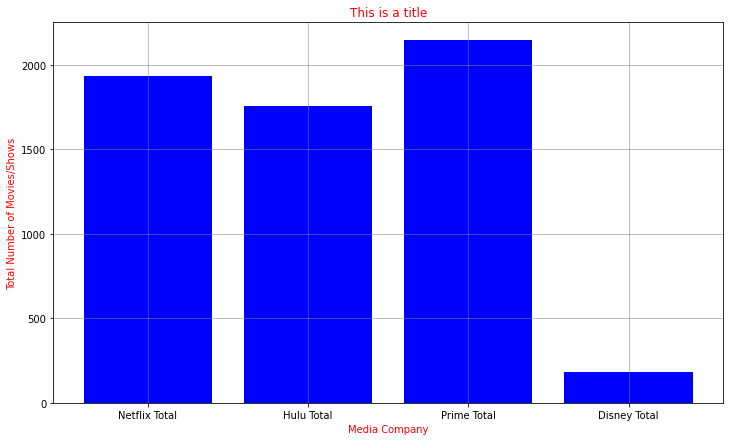

In [ ]:
#**** SIMPLE DATA VISUALIZATION WITH MATPLOTLIB ****

# MATPLOTLIB is a very, very good visualization tool for plotting datasets. It has way too many features for us to go over in this workshop, but we encourage you to check out the official documentation. 

import matplotlib.pyplot as plt
%matplotlib inline   


fig = plt.figure(figsize=(12,7)) # create a figure object, think of this as a canvas for your plots, figsize will determine the size of plot

plt.bar(['Netflix Total', 'Hulu Total', 'Prime Total', 'Disney Total'], [netflix_total, hulu_total, prime_total, disney_total], color = 'blue') # .bar(x-axis, y-axis, color)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)  # change the background grid 
plt.title('This is a title', color = 'red')
plt.xlabel('Media Company', color = 'red')
plt.ylabel('Total Number of Movies/Shows', color = 'red')